In [1]:
library(MASS)
library(corrplot)
library(boot)
library(leaps)
library(splines)
library(tree)

corrplot 0.92 loaded



In [15]:
roughContact1 <- read.csv('../../../data/RoughContact/newPulloffJan28th.csv', header = TRUE,  sep = ';')[, -1]
roughContact2 <- read.csv('../../../data/RoughContact/pulloff4AIlabelled.csv', header = TRUE,  sep = ',')[, -1]

roughContact <- rbind(roughContact1, roughContact2)

head(roughContact)

,L,lambdaR,lambdaS,surfaceEnergy,rho,pulloff
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,512,128,2,0.0173428,0.01586214,3.40e-07
2,512,128,2,0.0433570,0.02921830,1.82e-06
3,512,128,2,0.0693712,0.03997010,3.76e-06
4,512,128,2,0.0867140,0.05826470,8.74e-06
5,512,128,2,0.1300710,0.07634850,1.60e-05
6,512,128,2,0.1647566,0.08938030,2.34e-05


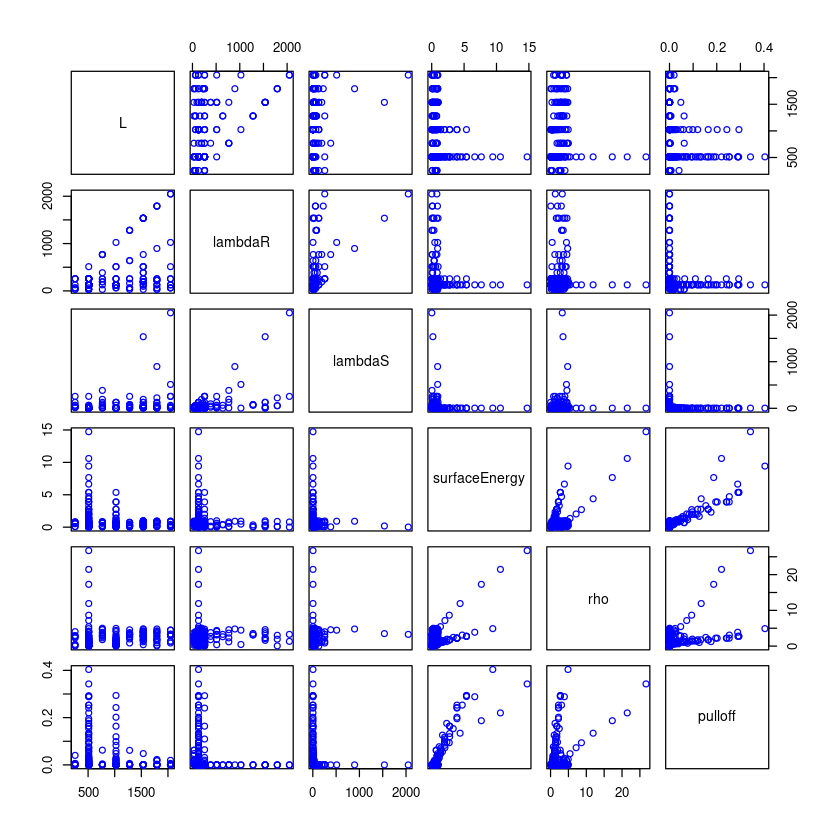

In [16]:
pairs(~ L + lambdaR + lambdaS + surfaceEnergy + rho + pulloff, data = roughContact, col = 'blue')

In [17]:
summary(roughContact)

       L             lambdaR          lambdaS        surfaceEnergy      
 Min.   : 256.0   Min.   :  32.0   Min.   :   1.00   Min.   : 0.005227  
 1st Qu.: 512.0   1st Qu.: 128.0   1st Qu.:   2.00   1st Qu.: 0.165033  
 Median : 512.0   Median : 128.0   Median :   4.00   Median : 0.436390  
 Mean   : 884.8   Mean   : 269.8   Mean   :  46.04   Mean   : 0.930987  
 3rd Qu.:1280.0   3rd Qu.: 256.0   3rd Qu.:  24.00   3rd Qu.: 0.861006  
 Max.   :2048.0   Max.   :2048.0   Max.   :2048.00   Max.   :14.730300  
      rho              pulloff         
 Min.   : 0.01472   Min.   :0.0000001  
 1st Qu.: 0.41072   1st Qu.:0.0000266  
 Median : 1.22085   Median :0.0003204  
 Mean   : 2.00489   Mean   :0.0300045  
 3rd Qu.: 2.91309   3rd Qu.:0.0178714  
 Max.   :26.71893   Max.   :0.4036770  

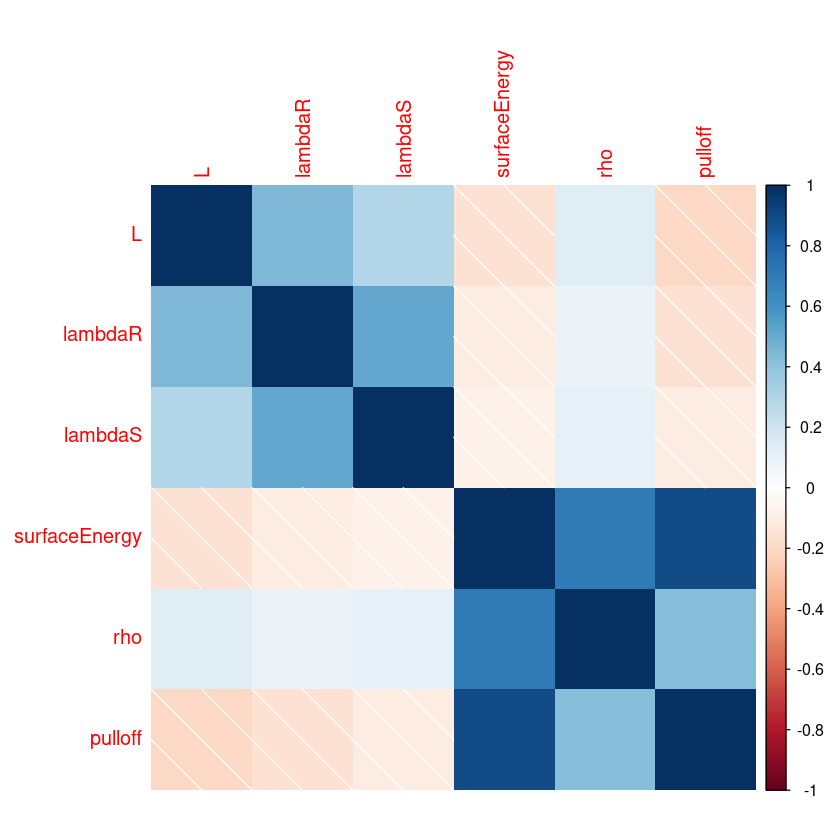

In [25]:
roughContact.cor <- cor(roughContact)

corrplot(roughContact.cor, method='shade')

In [19]:
set.seed(1)

sample <- sample(c(TRUE, FALSE), nrow(roughContact), replace = TRUE, prob = c(0.8, 0.2))
train <- roughContact[sample, ]
test <- roughContact[!sample, ]

In [20]:
lmFit <- lm(pulloff ~ rho + surfaceEnergy, data = train)
summary(lmFit)


Call:
lm(formula = pulloff ~ rho + surfaceEnergy, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.093931 -0.015354 -0.006616  0.012813  0.084502 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0065814  0.0020752   3.171  0.00176 ** 
rho           -0.0099086  0.0008415 -11.775  < 2e-16 ***
surfaceEnergy  0.0471623  0.0014702  32.079  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02402 on 196 degrees of freedom
Multiple R-squared:  0.8721,	Adjusted R-squared:  0.8708 
F-statistic: 668.4 on 2 and 196 DF,  p-value: < 2.2e-16


In [26]:
pred <- predict(lmFit, test)

sqrt(mean((test$pulloff - pred)^2))

[1] 0.0211626

In [27]:
lmFit2 <- lm(pulloff ~ surfaceEnergy * rho, data = train)
summary(lmFit2)


Call:
lm(formula = pulloff ~ surfaceEnergy * rho, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.051544 -0.012387  0.001743  0.008674  0.062092 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.0090870  0.0019814  -4.586 8.06e-06 ***
surfaceEnergy      0.0563446  0.0013138  42.888  < 2e-16 ***
rho               -0.0034418  0.0008091  -4.254 3.26e-05 ***
surfaceEnergy:rho -0.0010850  0.0000860 -12.616  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01787 on 195 degrees of freedom
Multiple R-squared:  0.9296,	Adjusted R-squared:  0.9285 
F-statistic: 858.2 on 3 and 195 DF,  p-value: < 2.2e-16


In [28]:
pred <- predict(lmFit2, test)

sqrt(mean((test$pulloff - pred)^2))

[1] 0.0143437

In [29]:
regFit <- regsubsets(pulloff ~ ., train)
summary(regFit)

Subset selection object
Call: regsubsets.formula(pulloff ~ ., train)
5 Variables  (and intercept)
              Forced in Forced out
L                 FALSE      FALSE
lambdaR           FALSE      FALSE
lambdaS           FALSE      FALSE
surfaceEnergy     FALSE      FALSE
rho               FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: exhaustive
         L   lambdaR lambdaS surfaceEnergy rho
1  ( 1 ) " " " "     " "     "*"           " "
2  ( 1 ) " " " "     " "     "*"           "*"
3  ( 1 ) " " " "     "*"     "*"           "*"
4  ( 1 ) "*" " "     "*"     "*"           "*"
5  ( 1 ) "*" "*"     "*"     "*"           "*"

In [32]:
splineFit <- lm(pulloff ~ bs(rho * surfaceEnergy, df = 25), data = train)
summary(splineFit)


Call:
lm(formula = pulloff ~ bs(rho * surfaceEnergy, df = 25), data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.164913 -0.004466 -0.000033  0.001333  0.171458 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         5.911e-06  2.306e-02   0.000  0.99980    
bs(rho * surfaceEnergy, df = 25)1  -1.951e-05  3.489e-02  -0.001  0.99955    
bs(rho * surfaceEnergy, df = 25)2   3.691e-05  3.165e-02   0.001  0.99907    
bs(rho * surfaceEnergy, df = 25)3  -4.985e-05  3.373e-02  -0.001  0.99882    
bs(rho * surfaceEnergy, df = 25)4   1.442e-04  3.322e-02   0.004  0.99654    
bs(rho * surfaceEnergy, df = 25)5  -2.869e-04  3.520e-02  -0.008  0.99351    
bs(rho * surfaceEnergy, df = 25)6   5.619e-04  3.094e-02   0.018  0.98553    
bs(rho * surfaceEnergy, df = 25)7  -7.772e-04  3.597e-02  -0.022  0.98278    
bs(rho * surfaceEnergy, df = 25)8   4.979e-03  3.764e-02   0.132  0.89491    
bs(rho * surf

In [33]:
pred <- predict(splineFit, test)

sqrt(mean((test$pulloff - pred)^2))

[1] 0.03148749